# Data Mining Twitter

github.com/BALBOARC

## Authenticating with Twitter Via Tweepy

In [1]:
import tweepy

In [2]:
import keys

In [3]:
auth = tweepy.OAuthHandler(keys.consumer_key, 
                          keys.consumer_secret)

In [4]:
auth.set_access_token(keys.access_token,
                      keys.access_token_secret)

In [5]:
api = tweepy.API(auth, wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)

## Getting Information About a Twitter Account

In [6]:
nasa = api.get_user('nasa')
nasa.id

11348282

In [7]:
nasa.name

'NASA'

In [8]:
nasa.screen_name

'NASA'

In [9]:
nasa.description

'Exploring the universe and our home planet. 🌎🚀'

In [10]:
nasa.status.text

'"I came to understand later that there was some skepticism that I could do design engineering...So, every hard prob… https://t.co/qI2ZCFZDF5'

In [11]:
nasa.followers_count

44532100

In [12]:
nasa.friends_count

204

In [13]:
me = api.me()

In [14]:
me.friends_count

29

## Introduction to Tweepy Cursors: Getting an Account’s Followers and Friends

In [15]:
followers = []

In [16]:
cursor = tweepy.Cursor(api.followers, screen_name='nasa')

In [17]:
for account in cursor.items(10):
    followers.append(account.screen_name)

In [18]:
print('Followers:', 
      ' '.join(sorted(followers, key=lambda s: s.lower())))

Followers: cardboardcuddle Carla61338894 couquie_purplat felipe86510941 IllescasStalyn Israelj06684359 itsyoungtommy sadmapetrin SivaprasadVB william43133566


In [19]:
# cursor = tweepy.Cursor(api.followers, screen_name='nasa', count=200)

In [20]:
# Determining Whom an Account Follows
friends = []

In [21]:
cursor = tweepy.Cursor(api.friends, screen_name='nasa')

In [22]:
for friend in cursor.items(10):
    friends.append(friend.screen_name)

In [23]:
print('Friends:', 
     ' '.join(sorted(friends, key=lambda s: s.lower())))

Friends: Astro_Megan Astro_SEAL dominickmatthew DoNASAScience KathyLueders MarkKirasich NASAArtemis NASAPersevere NASARoman uaespaceagency


In [24]:
# Getting a User’s Recent Tweets
nasa_tweets = api.user_timeline(screen_name='nasa', count=3)

In [25]:
for tweet in nasa_tweets:
    print(f'{tweet.user.screen_name}: {tweet.text}\n')

NASA: "I came to understand later that there was some skepticism that I could do design engineering...So, every hard prob… https://t.co/qI2ZCFZDF5

NASA: 😮 How it looked when @NASAPersevere landed on Mars
🌌 Astronauts on the @Space_Station prepared for a pair of spacew… https://t.co/QNvI6gRFdE

NASA: Helmets and gloves are coming off as @AstroVicGlover and Kate Rubins begin to take off their spacesuits, assisted b… https://t.co/RPaDfLrmya



In [26]:
# Grabbing Recent Tweets from Your Own Timeline
# api.home_timeline()

## Searching Recent Tweets

In [27]:
from textblob import TextBlob
from tweetutilities import print_tweets

In [28]:
tweets = api.search(q='Mars Opportunity Rover', count=3)

In [29]:
print_tweets(tweets)

RT @cmd9284: #xtz has the people,the platform,the news, and the fuel to launch 🚀 to Mars and hang out with rover perseverance until it make…

@CJAMcMahon @_TheSeaning @NASAPersevere It was for Spirit and Opportunity, presumably it's similar for Curiosity an… https://t.co/rbvoHdn7hl

Here is a winner! Losers cry anti immigration, sexism, racism, it’s all bs. Here is real opportunity realized! https://t.co/AfbIY4hZNx



In [30]:
# Certifique-se que o TextBLob está instalado:
# pip install -U textblob
# python -m textblob.download_corpora (consegui utilizando o terminal do linux)

## Searching for a Hashtag

In [31]:
tweets = api.search(q='#collegefootball', count=2)

In [32]:
print_tweets(tweets)

I write essays and handle online classes at an affordable fee. 
Feel free to contact me for help. 

👑Brainywriters2… https://t.co/jUycP23K7E

RT @woodwardsports: Go Green! Go Blue! Just don’t root for you know who! 
#GoGreen #GoWhite #GoBlue #BuckOhioState #collegefootball #rivals…



## Spotting Trends: Twitter Trends API

In [33]:
trends_available = api.trends_available()

In [34]:
len(trends_available)

467

In [35]:
trends_available[1]

{'name': 'Winnipeg',
 'placeType': {'code': 7, 'name': 'Town'},
 'url': 'http://where.yahooapis.com/v1/place/2972',
 'parentid': 23424775,
 'country': 'Canada',
 'woeid': 2972,
 'countryCode': 'CA'}

In [36]:
# Worldwide Trending Topics
world_trends = api.trends_place(id=1)

In [37]:
trends_list = world_trends[0]['trends']

In [38]:
trends_list[0]

{'name': 'Rafael Portugal',
 'url': 'http://twitter.com/search?q=%22Rafael+Portugal%22',
 'promoted_content': None,
 'query': '%22Rafael+Portugal%22',
 'tweet_volume': 42243}

In [39]:
trends_list = [t for t in trends_list if t['tweet_volume']]

In [40]:
from operator import itemgetter

In [41]:
trends_list.sort(key=itemgetter('tweet_volume'), reverse=True)

In [42]:
for trend in trends_list[:5]:
    print(trend['name'])

spotify
Kakao M
#CPAC2021
Eren
#CarlaMoreau


In [43]:
# New York City Trending Topics
nyc_trends = api.trends_place(id=2459115) # New York City WOEID
nyc_list = nyc_trends[0]['trends']

In [44]:
nyc_list = [t for t in nyc_list if t['tweet_volume']]

In [45]:
nyc_list.sort(key=itemgetter('tweet_volume'), reverse=True)

In [46]:
for trend in nyc_list[:5]:
    print(trend['name'])

spotify
Kakao M
apple
Cuomo
#CPAC2021


## Create a Word Cloud from Trending Topics

In [47]:
topics = {}

In [48]:
for trend in nyc_list:
    topics[trend['name']] = trend['tweet_volume']

In [49]:
from wordcloud import WordCloud

In [50]:
wordcloud = WordCloud(width=800, height=600, prefer_horizontal=0.5, min_font_size=10, colormap='prism', background_color='black')

In [51]:
wordcloud = wordcloud.fit_words(topics)

In [52]:
wordcloud = wordcloud.to_file('TrendingTwitter.png')

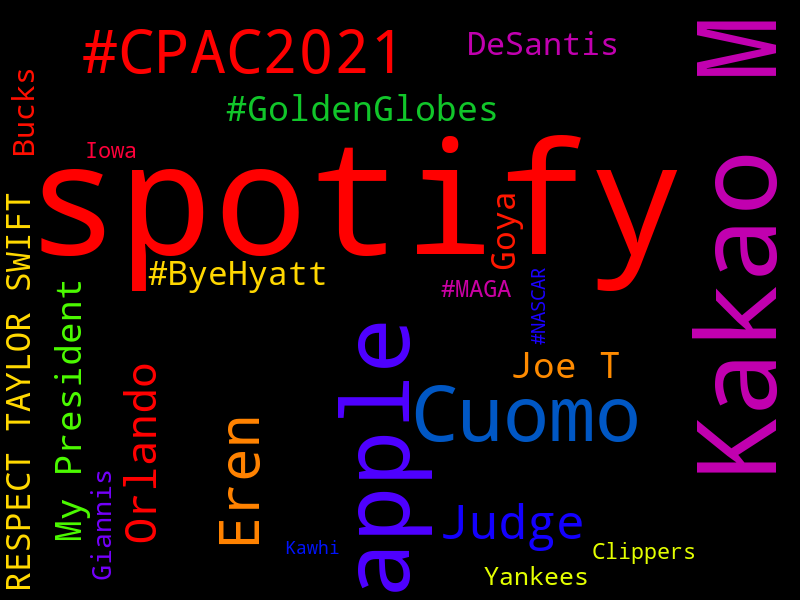

In [53]:
from IPython.display import Image
Image('TrendingTwitter.png')